In [ ]:
#!pip install tensorflow

In [ ]:
#pip install --upgrade keras

In [62]:
#! pip install pydot

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
#import pydot
import seaborn as sns

# Evaluation Library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Loading Digit Mnist dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

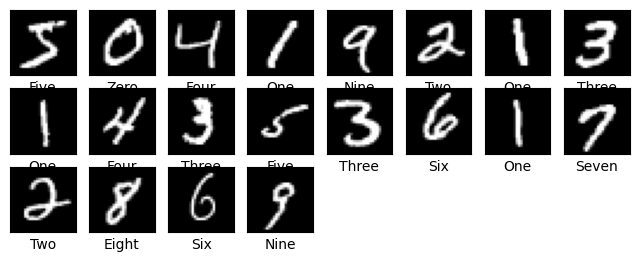

In [5]:
# names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the digits
plt.figure(figsize = (8,8))
for i in range(20):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap = 'grey')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [6]:
X_train_digit.shape

(60000, 28, 28)

In [7]:
X_test_digit.shape

(10000, 28, 28)

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [9]:
X_train_digit.shape

(60000, 784)

In [10]:
X_test_digit.shape


(10000, 784)

In [11]:
y_test_digit.shape

(10000,)

In [12]:
#Encoding Digit Mnist Labels------Using One hot encoding technique

y_train_digit = to_categorical(y_train_digit, num_classes = 10)

y_test_digit = to_categorical(y_test_digit, num_classes = 10)

In [13]:
y_train_digit[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
y_test_digit[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# Creating Base Neural Network

model = keras.Sequential([
    layers.Dense(256, activation = 'relu', input_shape = (784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation = 'relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10, activation = 'sigmoid'),
])


C:\Users\Hxtreme\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Formula: No. of Parameter = no. of Output channel * (no. of Input channel + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 222,730 (870.04 KB)

 Non-trainable params: 512 (2.00 KB)

1) Brain creation
2) Compiling the brain model
3) Fit Method

In [17]:
# Compiling the model

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [18]:
history = model.fit(X_train_digit, y_train_digit, batch_size = 100, epochs = 10, validation_data = (X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9056 - loss: 0.3045 - val_accuracy: 0.9537 - val_loss: 0.1470
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9567 - loss: 0.1400 - val_accuracy: 0.9706 - val_loss: 0.0992
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9654 - loss: 0.1110 - val_accuracy: 0.9727 - val_loss: 0.0908
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9690 - loss: 0.0965 - val_accuracy: 0.9734 - val_loss: 0.0794
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9728 - loss: 0.0846 - val_accuracy: 0.9762 - val_loss: 0.0739
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9759 - loss: 0.0766 - val_accuracy: 0.9768 - val_loss: 0.0747
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9764 - loss: 0.0715 - val_accuracy: 0.9794 - val_loss: 0.0686
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9781 - loss: 0.0671 - val_

In [19]:
# Predicting the labels by testing the data

y_predict = model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [20]:
y_predict[0]

array([1.8393586e-03, 1.0772777e-02, 2.3832953e-01, 5.2664649e-01,
       8.3987294e-03, 4.5652047e-01, 9.9615536e-05, 9.9999148e-01,
       1.1560628e-01, 4.6341822e-01], dtype=float32)

In [21]:
y_predicts = np.argmax(y_predict, axis =1)

In [22]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
y_test_digit_eval = np.argmax(y_test_digit, axis = 1)

In [24]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

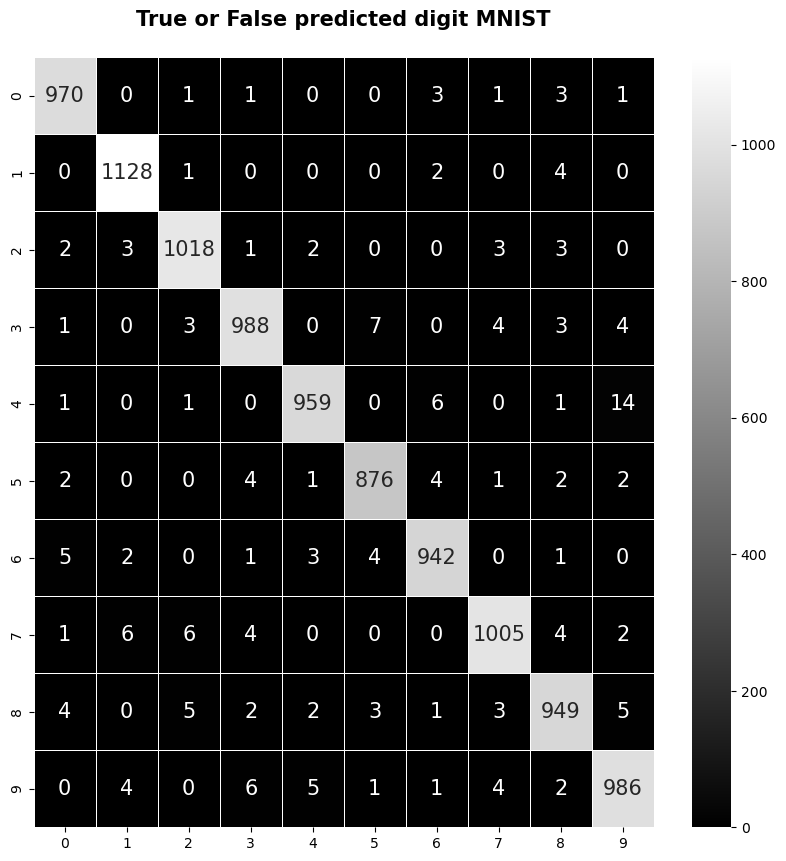

In [25]:
# Confusion matrix for Digit Mnist

conf_mat = confusion_matrix(y_test_digit_eval, y_predicts)
#plt.style.use('seaborn-deep')
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat, annot = True, annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='grey')
plt.title('True or False predicted digit MNIST\n', fontweight = 'bold', fontsize = 15)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval, y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



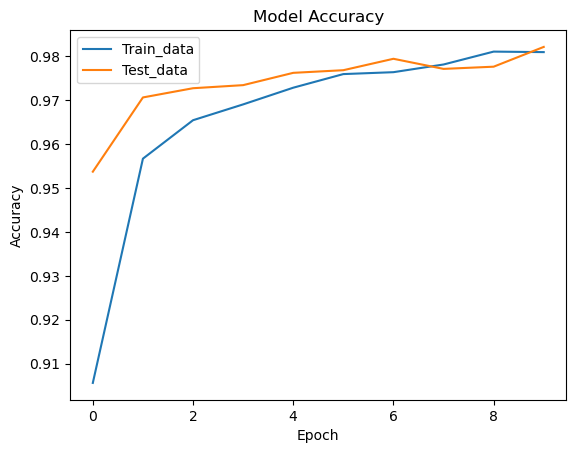

In [27]:
# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_data','Test_data'], loc = 'best')
plt.show()

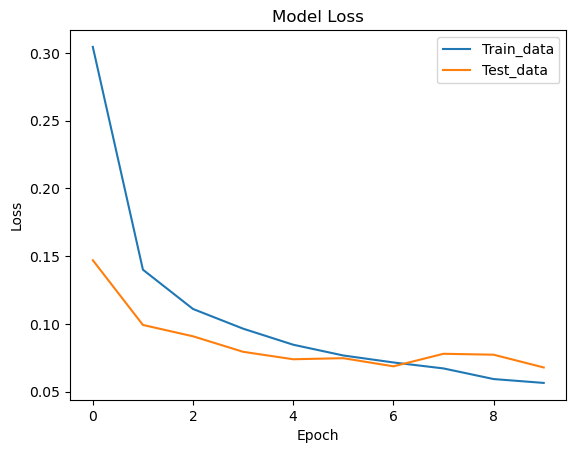

In [28]:
# Loss Graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_data', 'Test_data'], loc = 'best')
plt.show()

In [29]:
# tf.expand_dimension(X_test_digit[0])
idx = 4
y_predict_single = model.predict(X_test_digit[[idx]])
print(y_predict_single)
y_predicts_single = np.argmax(y_predict_single, axis=1)
print(y_predicts_single)
y_test_digit_eval = np.argmax(y_test_digit, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.07577858 0.00338519 0.34565347 0.00175003 0.9999958  0.10553367
  0.00383645 0.070127   0.00637611 0.98054034]]
[4]


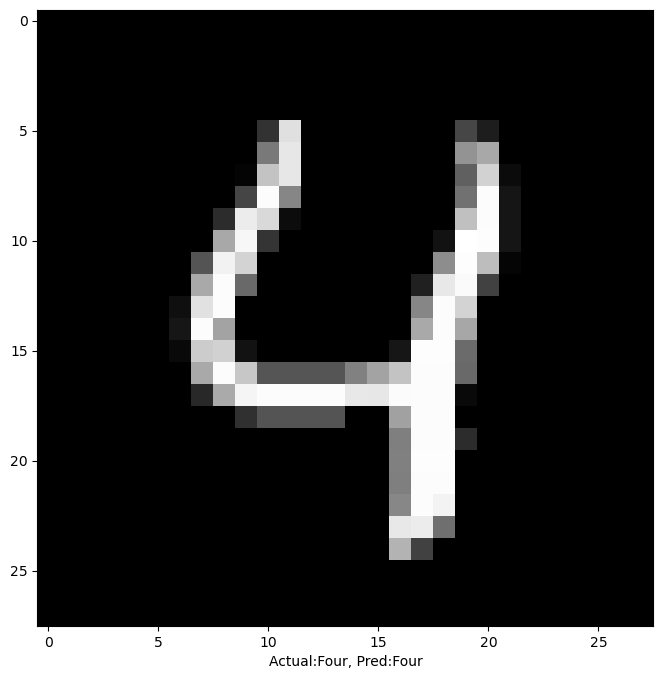

In [30]:
# Number names of the dataset in order
col_names = ['Zero', 'One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the digits
plt.figure(figsize = (8,8))
plt.imshow(X_test_digit[idx].reshape(28,28),cmap = 'grey')
plt.xlabel("Actual:{}, Pred:{}".format(col_names[np.argmax(y_test_digit[idx])], col_names[y_predicts_single[0]]))
plt.show()